In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2021-01-27'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nb_train = 5000
nb_test = 100
krnlinit = 'rdn'
nblay = 3
nbclust = 4
filt = 2
spajit = np.arange(0,20,0.5)
timjit = np.arange(0,50000, 1000)

../Records/nmnist/models/2021-02-08_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8].pkl


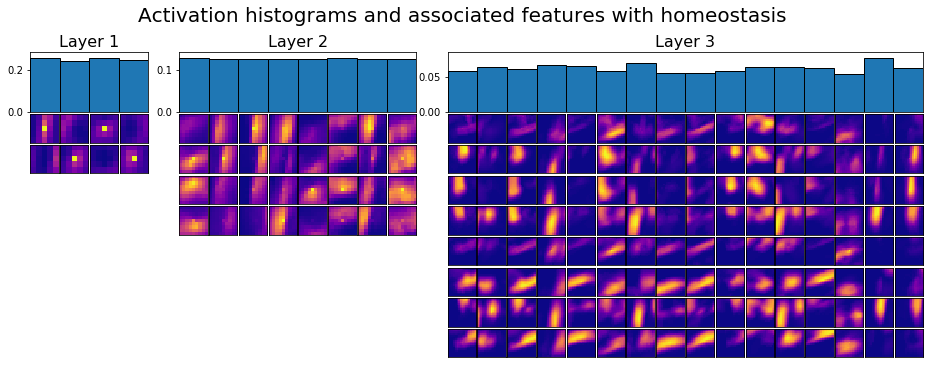

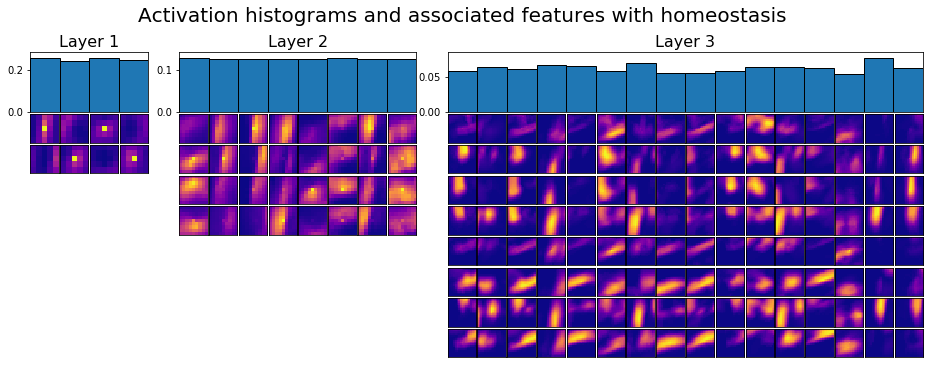

In [3]:
hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
hotshom = hotshom.learningall(dataset=dataset)
hotshom.plotlayer()

In [4]:
trainmap = hotshom.running(nb_digit = nb_train)

# Spatial Jitter only on the classification

# Temporal Jitter only on the classification

In [5]:
for i in timjit:
    i = round(i,1)
    jitonic = [i,None]
    testmap = hotshom.running(train=False, nb_digit=nb_test, jitonic=jitonic)

# Testing without homeostasis

In [6]:
for i in timjit:
    i = round(i,1)
    jitonic = [i,None]
    trainmaphom = hotshom.running(homeotest=True, train=False, nb_digit=nb_test, jitonic=jitonic)